<a href="https://colab.research.google.com/github/SaiDhanyaa/ExcelR_Assignments/blob/main/ASSIGNMENT_7_CRIME_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


## ***HIERARCHICAL CLUSTERING***

In [2]:
#IMPRT HIERARCHICAL CLUSTERING LIBRARIES
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler

In [3]:
crime=pd.read_csv("/content/crime_data.csv")

In [4]:
crime.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime.rename(columns={'Unnamed: 0':'country'}, inplace = True)
crime.head()

,country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
# Normalization function ..# Normalized data frame (considering all the numerical part of data)
norm = MinMaxScaler()
crime_norm = pd.DataFrame(norm.fit_transform(crime.iloc[:,1:]))
crime_norm.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# ***SINGLE LINKAGE METHOD***

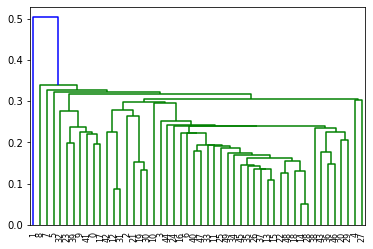

In [7]:
# create dendrogram
dendrogram1 = sch.dendrogram(sch.linkage(crime_norm, method='single'))

In [8]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [9]:
# save clusters for chart
y_hc1 = hc1.fit_predict(crime_norm)
Clusters1=pd.DataFrame(y_hc1,columns=['Clusters'])

In [10]:
Clusters1.head()

,Clusters
0,0
1,1
2,0
3,0
4,0


In [11]:
crime['h_clust'] = Clusters1

In [12]:
crime

,country,Murder,Assault,UrbanPop,Rape,h_clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [13]:
crime.iloc[:,1:].groupby(crime.h_clust).mean()

,Murder,Assault,UrbanPop,Rape,h_clust
h_clust,,,,,
0,7.742857,168.877551,65.897959,20.757143,0
1,10.000000,263.000000,48.000000,44.500000,1


## ***COMPLETE LINKAGE METHOD***

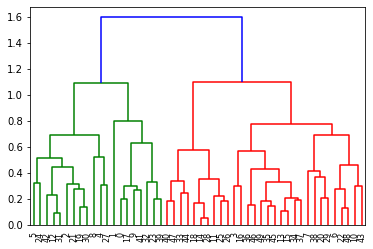

In [14]:
# create dendrogram
dendrogram2 = sch.dendrogram(sch.linkage(crime_norm, method='complete'))

In [15]:
# create clusters
hc2 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [16]:
# save clusters for chart
y_hc2 = hc2.fit_predict(crime_norm)
Clusters2=pd.DataFrame(y_hc2,columns=['Clusters'])

In [17]:
Clusters2

,Clusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [18]:
crime['h_clust'] = Clusters2

In [19]:
crime.head()

,country,Murder,Assault,UrbanPop,Rape,h_clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [20]:
crime.iloc[:,1:].groupby(crime.h_clust).mean()

,Murder,Assault,UrbanPop,Rape,h_clust
h_clust,,,,,
0,12.165,255.25,68.4,29.165,0
1,5.715,132.30,70.8,18.100,1
2,3.180,78.70,49.3,11.630,2


## ***AVERAGE LINKAGE METHOD***

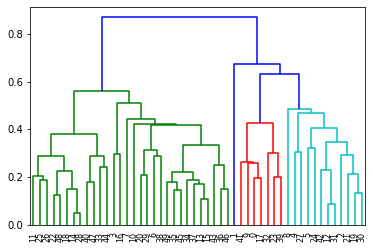

In [21]:
# create dendrogram
dendrogram3 = sch.dendrogram(sch.linkage(crime_norm, method='average'))

In [22]:
# create clusters
hc3 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [23]:
# save clusters for chart
y_hc3 = hc3.fit_predict(crime_norm)
Clusters3=pd.DataFrame(y_hc3,columns=['Clusters'])

In [24]:
Clusters3

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [25]:
crime['h_clust'] = Clusters3

In [26]:
crime.head()

,country,Murder,Assault,UrbanPop,Rape,h_clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [27]:
crime.iloc[:,1:].groupby(crime.h_clust).mean()

,Murder,Assault,UrbanPop,Rape,h_clust
h_clust,,,,,
0,4.870000,114.433333,63.633333,15.943333,0
1,10.883333,256.916667,78.333333,32.250000,1
2,10.000000,263.000000,48.000000,44.500000,2
3,14.671429,251.285714,54.285714,21.685714,3


## ***CENTROID LINKAGE METHOD***

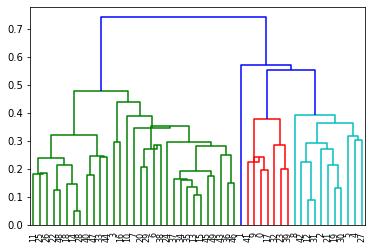

In [28]:
# create dendrogram
dendrogram4 = sch.dendrogram(sch.linkage(crime_norm, method='centroid'))

In [29]:
# create clusters
hc4 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [30]:
# save clusters for chart
y_hc4 = hc4.fit_predict(crime_norm)
Clusters4=pd.DataFrame(y_hc4,columns=['Clusters'])

In [31]:
Clusters4

,Clusters
0,3
1,1
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [32]:
crime['h_clust'] = Clusters4

In [33]:
crime.head()

,country,Murder,Assault,UrbanPop,Rape,h_clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [34]:
crime.iloc[:,1:].groupby(crime.h_clust).mean()

,Murder,Assault,UrbanPop,Rape,h_clust
h_clust,,,,,
0,6.055556,140.055556,71.333333,18.683333,0
1,10.815385,257.384615,76.000000,33.192308,1
2,3.091667,76.000000,52.083333,11.833333,2
3,14.671429,251.285714,54.285714,21.685714,3



## ***Inference :***

# 1.Average murder is highest in countries in cluster 3

# 2Average assault and rape is highest in countries in cluster 1, where the urban population is also highest

## ***KMEAN***

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [36]:
crime= pd.read_csv("/content/crime_data.csv")

In [37]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [38]:
crime.rename(columns={'Unnamed: 0':'country'}, inplace = True)
crime.head()

,country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [39]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])

In [40]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [41]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

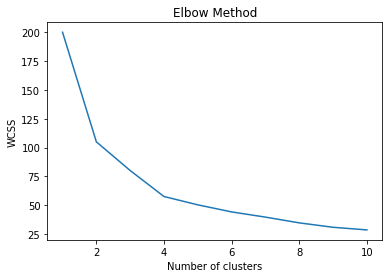

In [42]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## ***WE HAVE CHOSEN THE BEST K VALUE IS 4. AND WE ARE GOING WITH IT***

In [43]:
# buuild the clusters algorithm
from sklearn.cluster import KMeans
kmeans_cluster = KMeans(n_clusters=4, random_state=42)
kmeans_cluster.fit(scaled_crime_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [44]:
kmeans_cluster.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1], dtype=int32)

# ***THESE ARE THE CLUSTER MEMBERS, THAT WE ARE GOING TO APPEND IT IN THE airlines DATASET***

In [45]:
crime['clust4']=kmeans_cluster.labels_

In [46]:
crime.head()

,country,Murder,Assault,UrbanPop,Rape,clust4
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3


In [47]:
crime.iloc[:,1:].groupby(crime.clust4).mean()

,Murder,Assault,UrbanPop,Rape,clust4
clust4,,,,,
0,13.937500,243.625000,53.750000,21.412500,0
1,5.656250,138.875000,73.875000,18.781250,1
2,3.600000,78.538462,52.076923,12.176923,2
3,10.815385,257.384615,76.000000,33.192308,3


## ***Inference :***
# 1. Average murder is highest in countries in cluster 0
# 2. Average assault and rape is highest in countries in cluster 3, where the urban population is also highest 

## ***WE HAVE CHOSEN THE BEST K VALUE IS 5. AND WE ARE GOING WITH IT***

In [48]:
# buuild the clusters algorithm
from sklearn.cluster import KMeans
kmeans_cluster = KMeans(n_clusters=5, random_state=42)
kmeans_cluster.fit(scaled_crime_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [49]:
kmeans_cluster.labels_

array([3, 0, 0, 4, 0, 0, 2, 4, 0, 3, 2, 1, 0, 4, 1, 4, 4, 3, 1, 0, 2, 0,
       1, 3, 0, 4, 4, 0, 1, 2, 0, 0, 3, 1, 2, 4, 4, 2, 2, 3, 1, 3, 0, 2,
       1, 4, 2, 1, 1, 4], dtype=int32)

# ***THESE ARE THE CLUSTER MEMBERS, THAT WE ARE GOING TO APPEND IT IN THE airlines DATASET***

In [50]:
crime['clust5']=kmeans_cluster.labels_

In [51]:
crime.head()

,country,Murder,Assault,UrbanPop,Rape,clust4,clust5
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,3,0
2,Arizona,8.1,294,80,31.0,3,0
3,Arkansas,8.8,190,50,19.5,0,4
4,California,9.0,276,91,40.6,3,0


In [52]:
crime.iloc[:,1:].groupby(crime.clust5).mean()

,Murder,Assault,UrbanPop,Rape,clust4,clust5
clust5,,,,,,
0,10.815385,257.384615,76.000000,33.192308,3.000000,0
1,2.680000,70.100000,51.000000,10.910000,2.000000,1
2,4.955556,125.444444,80.111111,17.788889,1.000000,2
3,14.671429,251.285714,54.285714,21.685714,0.000000,3
4,6.790909,145.727273,61.636364,19.009091,1.181818,4


## ***Inference :***
# 1. Average murder is highest in countries in cluster 3
# 2. Average assault and rape is highest in countries in cluster 0, where the urban population is also highest 

## ***DBSCAN***

In [91]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
crimedb=pd.read_csv('/content/crime_data.csv')

In [93]:
crimedb.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [94]:
crimedb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [97]:
scaledcrime=StandardScaler().fit_transform(crimedb.iloc[:,1:])
scaledcrime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [98]:
## performing dbscan algorithm
dbscan=DBSCAN(eps=2, min_samples=5)
dbscan.fit(scaledcrime)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
### noe to see the clusters,
dbscan.labels_

In [103]:
crimedb['cluster']=dbscan.labels_

In [104]:
crimedb

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


# ***Inference : From above record we can say 'Alaska' (2nd record) is noise in our dataset***